In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0,10.0)

df= pd.read_csv("C://Users//Dhana//Documents//PGA21//headbrain.csv")
df.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [3]:
df.shape

(237, 4)

In [4]:
df.columns

Index(['Gender', 'Age Range', 'Head Size(cm^3)', 'Brain Weight(grams)'], dtype='object')

In [5]:
X = df['Head Size(cm^3)'].values
Y = df['Brain Weight(grams)'].values

In [11]:
mean_x = np.mean(X)
mean_y = np.mean(Y)

m = len(X)

numer = 0
denom = 0
for i in range (m):
    numer += (X[i]-mean_x)*(Y[i]-mean_y)
    denom += (X[i] - mean_x) ** 2
b1 = numer / denom
b0 = mean_y - (b1 * mean_x)

print(b1, b0)


0.26342933948939945 325.57342104944223


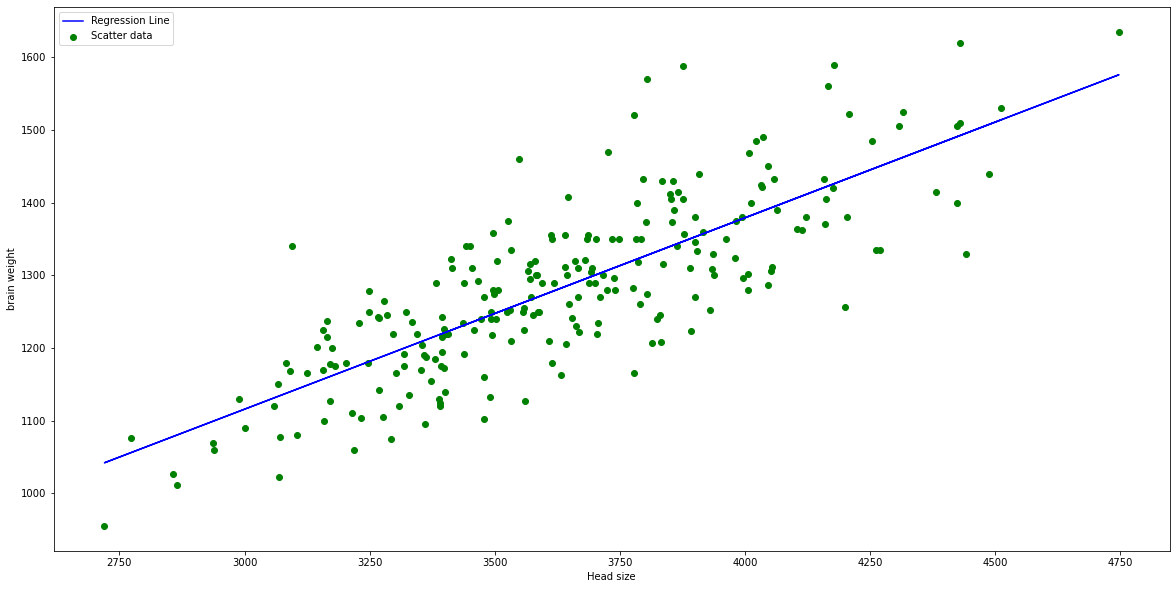

In [19]:
#plotting values and regression line

y = b0 + b1 * X
plt.plot(X,y, color = 'blue', label = 'Regression Line')
plt.scatter(X,Y, c = 'green', label = 'Scatter data')

plt.xlabel('Head size')
plt.ylabel('brain weight')
plt.legend()
plt.show()


In [24]:
# calculating root mean square error
rmse = 0
for i in range(m):
    y_pred = b0 + b1*X[i]
    rmse += (Y[i] - y_pred) ** 2
rmse = np.sqrt(rmse/m)
print("Root mean sqaure error",rmse)

Root mean sqaure error 72.1206213783709


In [26]:
# calculating R2 score
ss_tot = 0
ss_res = 0
for i in range(m):
    y_pred = b0 + b1*X[i]
    ss_tot += (Y[i] - mean_y)**2
    ss_res += (Y[i] - y_pred)**2
r2 = 1 - (ss_res/ss_tot)
print(r2)

0.6393117199570003


In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = X.reshape((m, 1))

reg = LinearRegression()
reg = reg.fit(X, Y)
y_pred = reg.predict(X)

r2_score = reg.score(X,Y)
print(r2_score)

0.639311719957
